### Regression Wrangle Exercises

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.
2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.
3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [12]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os
import env

In [13]:
def get_connection(db, user = env.user, host = env.host, password = env.password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [14]:
def zillow_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, 
                taxvaluedollarcnt, yearbuilt, taxamount, fips FROM properties_2017
                JOIN propertylandusetype USING(propertylandusetypeid)
                WHERE propertylandusetype.propertylandusetypeid = 261;                
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    return df

In [15]:
df = zillow_data()

In [16]:
df.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0


In [17]:
df.shape

(2152863, 7)

In [18]:
# null count not being shown in output seems sus
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [19]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [21]:
cols = list(df.columns)

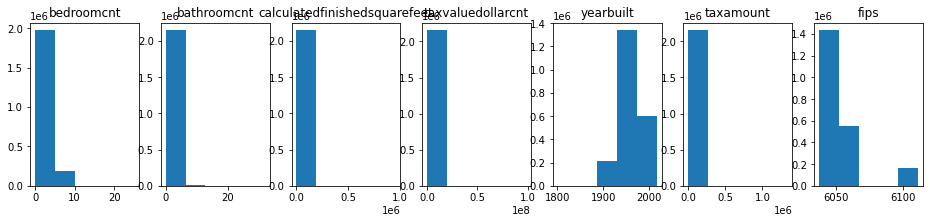

In [22]:
plt.figure(figsize = (16, 3))
for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

In [23]:
cols

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

<AxesSubplot:xlabel='bedroomcnt'>

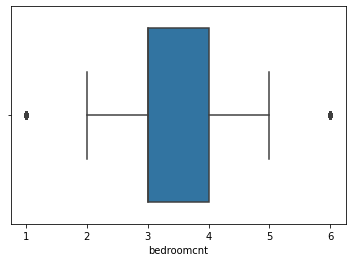

In [56]:
sns.boxplot(df['bedroomcnt'])

<AxesSubplot:xlabel='bathroomcnt'>

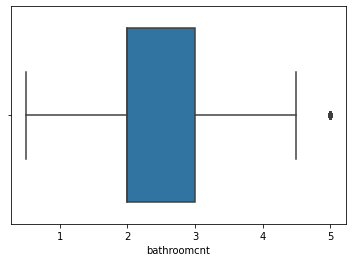

In [57]:
sns.boxplot(df['bathroomcnt'])

<AxesSubplot:xlabel='calculatedfinishedsquarefeet'>

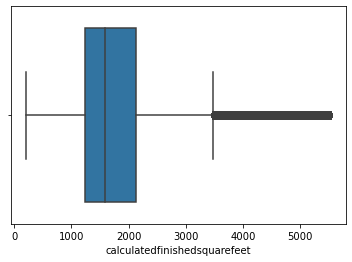

In [58]:
sns.boxplot(df['calculatedfinishedsquarefeet'])

<AxesSubplot:xlabel='taxvaluedollarcnt'>

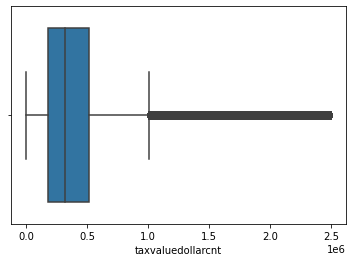

In [59]:
sns.boxplot(df['taxvaluedollarcnt'])

<AxesSubplot:xlabel='yearbuilt'>

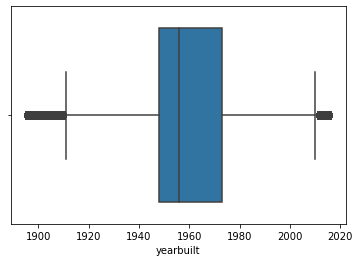

In [60]:
sns.boxplot(df['yearbuilt'])

<AxesSubplot:xlabel='taxamount'>

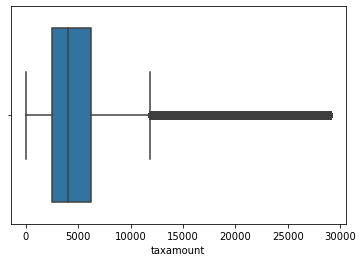

In [61]:
sns.boxplot(df['taxamount'])

<AxesSubplot:xlabel='fips'>

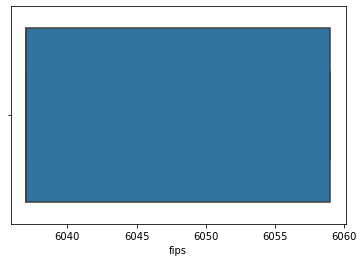

In [62]:
sns.boxplot(df['fips'])

In [63]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [33]:
df.bedroomcnt.isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
2152858    False
2152859    False
2152860    False
2152861    False
2152862    False
Name: bedroomcnt, Length: 2152863, dtype: bool

In [34]:
df.isnull().any()

bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [35]:
df.columns[df.isnull().any()]

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

In [36]:
# replace blank spaces with nan's
df = df.replace(r'^\s*$', np.nan, regex=True)

In [37]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [38]:
# drop nan's
df = df.dropna()
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2140235 non-null  float64
 1   bathroomcnt                   2140235 non-null  float64
 2   calculatedfinishedsquarefeet  2140235 non-null  float64
 3   taxvaluedollarcnt             2140235 non-null  float64
 4   yearbuilt                     2140235 non-null  float64
 5   taxamount                     2140235 non-null  float64
 6   fips                          2140235 non-null  float64
dtypes: float64(7)
memory usage: 130.6 MB


In [39]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
yearbuilt,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


In [41]:
for col in cols:
    print(df[col].value_counts())

3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64
2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64
1200.0     5184
1080.0     4376
1120.0     4

In [49]:
# remove outliers
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis = 1)
df = df[filtered_entries]

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,1926337.0,3.247187,0.873460,1.00,3.00,3.0,4.00,6.00
bathroomcnt,1926337.0,2.159870,0.847920,0.00,2.00,2.0,3.00,5.00
calculatedfinishedsquarefeet,1926337.0,1772.190309,745.336658,1.00,1242.00,1592.0,2137.00,5528.00
taxvaluedollarcnt,1926337.0,401176.306006,332162.325253,22.00,183321.00,318086.0,514072.00,2492000.00
yearbuilt,1926337.0,1959.529981,21.654867,1895.00,1948.00,1956.0,1973.00,2016.00
taxamount,1926337.0,4962.822719,3833.905820,18.72,2494.41,4025.9,6220.64,29047.87
fips,1926337.0,6043.145320,9.870772,6037.00,6037.00,6037.0,6059.00,6059.00


In [54]:
df = df[df['bathroomcnt'] != 0]
df[df['bathroomcnt'] == 0]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips


In [55]:
df = df[df['calculatedfinishedsquarefeet'] > 200]
df[df['calculatedfinishedsquarefeet'] < 200]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips


In [ ]:
def wrangle_zillow():
    '''
    This function pulls from the zillow database columns: 'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount' where properties are single family residential. Additionally, blank
       spaces are replaced with nan values, then those values are dropped. Finally, outliers and properties with 0
       bathrooms and less than 200 square feet are dropped.
    '''
    
    # load df with sql database dataset
    df = zillow_data()
    
    # replace blank spaces with nan's
    df = df.replace(r'^\s*$', np.nan, regex=True)
    
    # drop nan's
    df = df.dropna()
    
    # remove outliers
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis = 1)
    df = df[filtered_entries]
    df = df[df['bathroomcnt'] != 0]
    df = df[df['calculatedfinishedsquarefeet'] > 200]
    
    return df